In [7]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pandas.read_csv("reviews.csv",parse_dates=["Timestamp"])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


## Line Graph of ratings on a daily basis

### By count

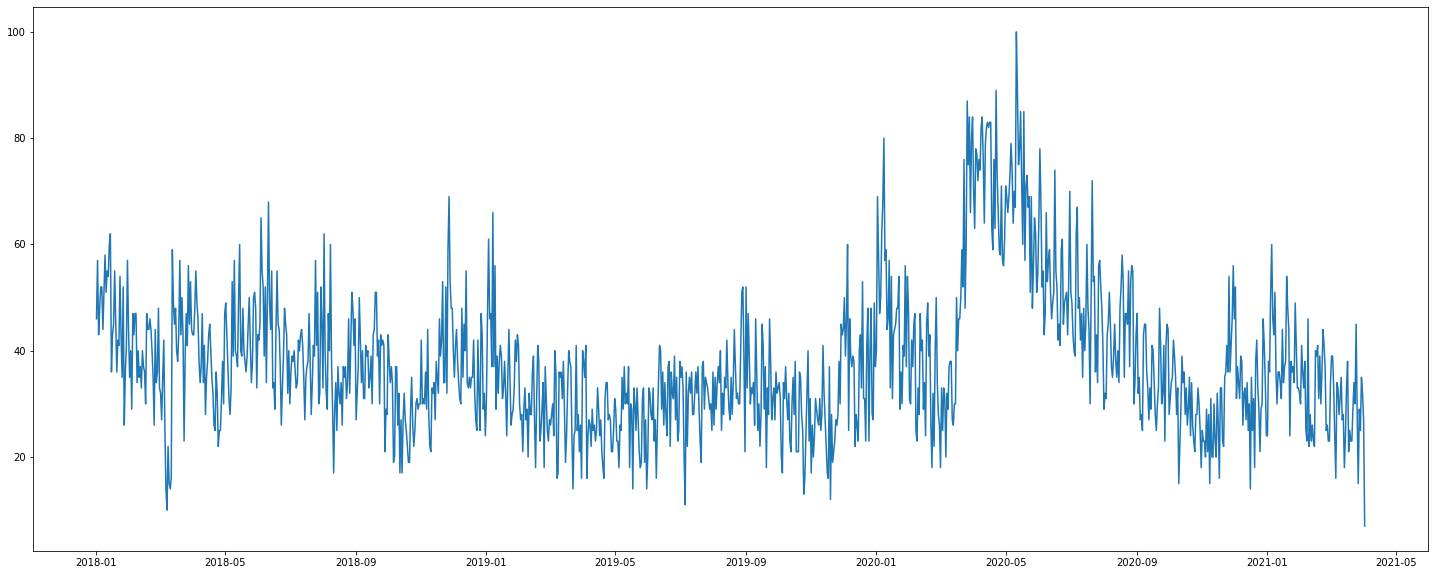

In [15]:
data["Day"] = data["Timestamp"].dt.date
day_average = data.groupby(["Day"]).count()

plt.figure(figsize=(25,10))
plt.plot(day_average.index, day_average["Rating"])

### By rating average

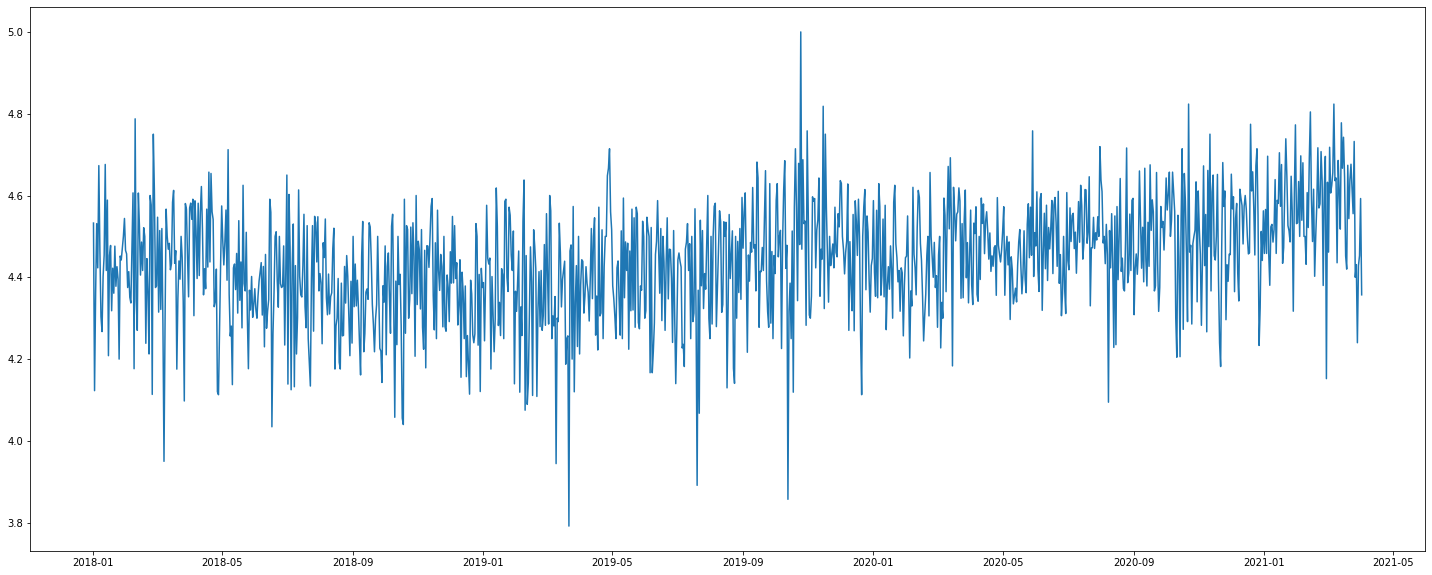

In [18]:
data["Day"] = data["Timestamp"].dt.date
day_average = data.groupby(["Day"]).mean()

plt.figure(figsize=(25,10))
plt.plot(day_average.index, day_average["Rating"])

## Rating Average by week

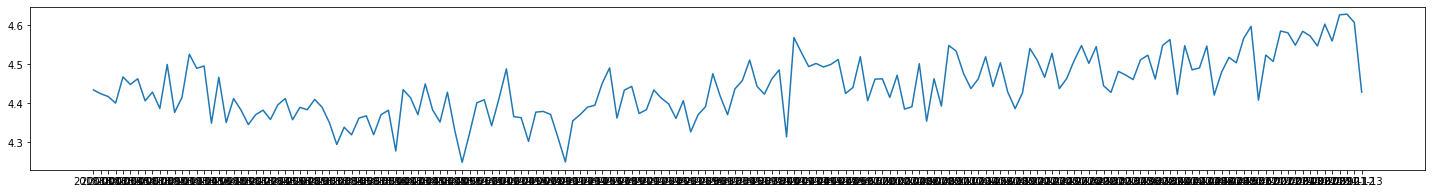

In [22]:
data["Week"] = data["Timestamp"].dt.strftime("%Y-%U")
week_average = data.groupby(["Week"]).mean()

plt.figure(figsize=(25,3))
plt.plot(week_average.index, week_average["Rating"])

## Average Rating by month

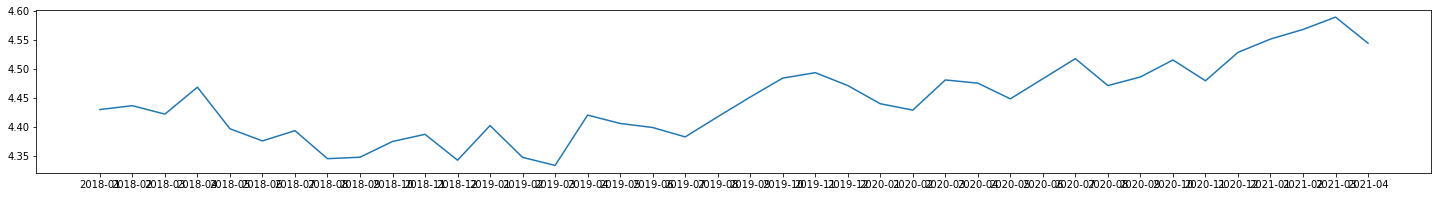

In [24]:
data["Month"] = data["Timestamp"].dt.strftime("%Y-%m")
month_average = data.groupby(["Month"]).mean()

plt.figure(figsize=(25,3))
plt.plot(month_average.index, month_average["Rating"])

### Average rating by month by course

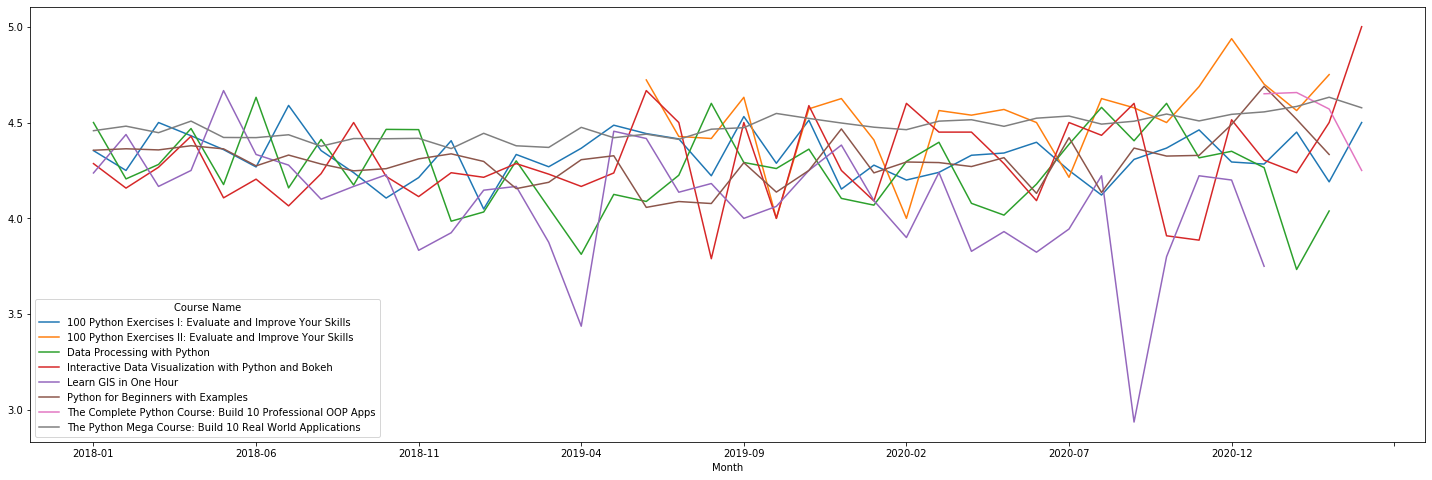

In [31]:
data["Month"] = data["Timestamp"].dt.strftime("%Y-%m")
month_average_course = data.groupby(["Month", "Course Name"])["Rating"].mean().unstack()
month_average_course.plot(figsize=(25,8))

## What day to people give highest ratings?

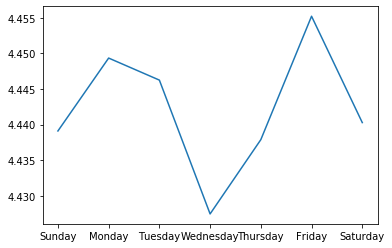

In [36]:
data["Weekday"] = data["Timestamp"].dt.strftime("%A")
data["Daynumber"] = data["Timestamp"].dt.strftime("%w")

weekday_average = data.groupby(["Weekday", "Daynumber"]).mean()
weekday_average = weekday_average.sort_values("Daynumber")


plt.plot(weekday_average.index.get_level_values(0),weekday_average["Rating"])